# INSY695 - Group Project
### Data Cleaning - Tiancheng Zhang

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [5]:
bpd_df = pd.read_csv('../data/crimes_with_calls_cleaned.csv')

## [NEW STUFF (Priority versus Description)](#new)

In [6]:
bpd_df.shape

(1239, 19)

In [7]:
bpd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1239 non-null   int64  
 1   CrimeDate        1239 non-null   object 
 2   CrimeTime        1239 non-null   object 
 3   CrimeCode        1239 non-null   object 
 4   Location         1239 non-null   object 
 5   Description      1239 non-null   object 
 6   Inside/Outside   1223 non-null   object 
 7   Weapon           307 non-null    object 
 8   Post             1239 non-null   float64
 9   District         1239 non-null   object 
 10  Neighborhood     1239 non-null   object 
 11  Longitude        1239 non-null   float64
 12  Latitude         1239 non-null   float64
 13  Location 1       1239 non-null   object 
 14  Premise          1222 non-null   object 
 15  Total Incidents  1239 non-null   int64  
 16  callDateTime     1239 non-null   object 
 17  Priority      

In [8]:
bpd_df.head(10)

,Unnamed: 0,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,callDateTime,Priority,CallDescription
0,31238,2017-01-19 00:00:00,19:00:00,6D,4200 WICKFORD RD,LARCENY FROM AUTO,NaN,NaN,541.0,NORTHERN,Roland Park,-76.62663,39.34035,"(39.3403500000, -76.6266300000)",NaN,1,2017-01-20 09:37:00,Low,LARCENY F/AUTO
1,31239,2017-01-19 00:00:00,19:00:00,6D,800 WEDGEWOOD RD,LARCENY FROM AUTO,NaN,NaN,823.0,SOUTHWESTERN,West Hills,-76.70612,39.29449,"(39.2944900000, -76.7061200000)",NaN,1,2017-01-20 05:55:00,Low,LARCENY F/AUTO
2,31244,2017-01-19 00:00:00,18:30:00,6E,3000 SHANNON DR,LARCENY,NaN,NaN,432.0,NORTHEASTERN,Belair-Edison,-76.56774,39.32524,"(39.3252400000, -76.5677400000)",NaN,1,2017-01-20 14:34:00,Low,LARCENY F/AUTO
3,31255,2017-01-19 00:00:00,17:50:00,7A,0 N PORT ST,AUTO THEFT,O,NaN,221.0,SOUTHEASTERN,Patterson Place,-76.58267,39.29265,"(39.2926500000, -76.5826700000)",STREET,1,2017-01-19 17:51:00,Medium,AUTO THEFT
4,31256,2017-01-19 00:00:00,17:30:00,5A,1300 CAMBRIA ST,BURGLARY,NaN,NaN,911.0,SOUTHERN,Curtis Bay,-76.59111,39.23224,"(39.2322400000, -76.5911100000)",NaN,1,2017-01-19 17:38:00,Medium,BURGLARY
5,31258,2017-01-19 00:00:00,17:00:00,6D,800 S BOULDIN ST,LARCENY FROM AUTO,O,NaN,232.0,SOUTHEASTERN,Canton,-76.57047,39.28273,"(39.2827300000, -76.5704700000)",STREET,1,2017-01-20 08:32:00,Low,LARCENY F/AUTO
6,31261,2017-01-19 00:00:00,16:49:00,3B,500 N CLINTON ST,ROBBERY - STREET,O,NaN,224.0,SOUTHEASTERN,Ellwood Park/Monument,-76.57070,39.29728,"(39.2972800000, -76.5707000000)",STREET,1,2017-01-19 16:25:00,Medium,FAMILY DISTURB
7,31268,2017-01-19 00:00:00,16:00:00,3AF,200 W MONUMENT ST,ROBBERY - STREET,O,FIREARM,142.0,CENTRAL,Mount Vernon,-76.61905,39.29742,"(39.2974200000, -76.6190500000)",STREET,1,2017-01-20 07:39:00,Low,MALE SLEEP
8,31270,2017-01-19 00:00:00,15:22:00,4C,1700 CLARKSON ST,AGG. ASSAULT,O,OTHER,942.0,SOUTHERN,South Baltimore,-76.61592,39.27002,"(39.2700200000, -76.6159200000)",STREET,1,2017-01-19 15:23:00,High,AGGRAV ASSAULT
9,31274,2017-01-19 00:00:00,15:00:00,6D,200 MALLOW HILL RD,LARCENY FROM AUTO,NaN,NaN,823.0,SOUTHWESTERN,Westgate,-76.71002,39.28084,"(39.2808400000, -76.7100200000)",NaN,1,2017-01-20 09:39:00,Low,LARCENY F/AUTO


## Dataset overview and ideas on cleaning, pre-processing and feature engineer

**The dataset has 276,259 observations and 15 variables. Variables in <span style="color:red">red</span> indicate the existence of missing values.**

- Timestamp
 * CrimeDate: we first changed it to datetime, and then created/extracted new variables such as season and month from CrimeDate.
 * CrimeTime: we can extract/transform HourofTheDay
- Categorical
 * CrimeCode: NEED A REFERENCE HERE
 * <span style="color:red">Inside/Outside</span>: need to regroup "I" and "O" to "Inside" and "Outside" respectively.
 * <span style="color:red">Weapon</span>: missing values account for $\frac{2}{3}$ of the dataset, since it's a categorical variable, it will be hard to impute. By taking a further look at Weapon vs Description, we assume the NULL values stand for "no weapon", so we assign NULL values to "None".
 * District: rough geographical segmentation.
 * Neighborhood: administritive/geographical segmentation, can link to education level and housing price, etc
 * <span style="color:red">Premise</span>: 123 different categories, top 5 most frequent are STREET,
ROW/TOWNHO, "PARKING LO", "APT/CONDO", "OTHER - IN", which account for more than 80% of the dataset.
 
- Numerical:
    * Post: geographical/administration segmentation (reference:http://moit.baltimorecity.gov/sites/default/files/police_districts_w_posts.pdf)
    * Longitude: useful for geographical analysis and visualization
    * Latitude: useful for geographical analysis and visualization
    * Location 1(DROPPED): provide same info as Longitude and Latitude, so we can probably drop this one.
    * Total Incidents: all one column, can be dropped.
    
 
- Unstructure:
 * <span style="color:red">Location</span>: suggest to drop.


### Null Values

In [9]:
null_count = bpd_df.isnull().sum()
null_prop = null_count / len(bpd_df)
pd.DataFrame({
    'Count': null_count,
    'Proportion': null_prop})

,Count,Proportion
Unnamed: 0,0,0.000000
CrimeDate,0,0.000000
CrimeTime,0,0.000000
CrimeCode,0,0.000000
Location,0,0.000000
Description,0,0.000000
Inside/Outside,16,0.012914
Weapon,932,0.752220
Post,0,0.000000
District,0,0.000000


### CrimeDate

In [10]:
bpd_df.CrimeDate = pd.to_datetime(bpd_df.CrimeDate)

In [11]:
date = bpd_df.CrimeDate.dt.month*100 + bpd_df.CrimeDate.dt.day
bpd_df['Season'] = (pd.cut(date,[0,321,620,922,1220,1300],
                       labels=['winter','spring','summer','autumn','winter '])
                  .str.strip()
               )

In [12]:
bpd_df['Season']

0       winter
1       winter
2       winter
3       winter
4       winter
         ...  
1234    winter
1235    winter
1236    winter
1237    winter
1238    winter
Name: Season, Length: 1239, dtype: object

In [13]:
bpd_df['Month'] = bpd_df.CrimeDate.dt.month

### CrimeTime

In [14]:
bpd_df['CrimeTime'] = [time if time != "24:00:00" else "0:00:00" for time in bpd_df['CrimeTime']]

In [15]:
bpd_df.CrimeTime = pd.to_datetime(bpd_df['CrimeTime'],format= '%H:%M:%S').dt.time

In [16]:
bpd_df.CrimeTime

0       19:00:00
1       19:00:00
2       18:30:00
3       17:50:00
4       17:30:00
          ...   
1234    02:00:00
1235    01:30:00
1236    00:45:00
1237    00:45:00
1238    00:10:00
Name: CrimeTime, Length: 1239, dtype: object

In [17]:
bpd_df['Hour'] = [int(str(time)[:2]) for time in bpd_df.CrimeTime]

### Inside/Outside

In [18]:
bpd_df['Inside/Outside'].unique()

array([nan, 'O', 'I', 'Outside', 'Inside'], dtype=object)

In [19]:
bpd_df['Inside/Outside'].value_counts()
bpd_df['Inside/Outside'] = bpd_df['Inside/Outside'].replace('I', 'Inside')
bpd_df['Inside/Outside'] = bpd_df['Inside/Outside'].replace('O', 'Outside')

### Total Incidents

In [20]:
bpd_df['Total Incidents'].describe()

count    1239.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Total Incidents, dtype: float64

### Premise

In [21]:
bpd_df['Premise'].value_counts()

STREET        475
ROW/TOWNHO    318
APT/CONDO      56
OTHER - IN     50
PARKING LO     38
SCHOOL         33
CONVENIENC     18
RETAIL/SMA     17
OTHER/RESI     16
GROCERY/CO     16
OTHER - OU     14
Street         12
YARD           12
SINGLE HOU     11
DRIVEWAY       10
ALLEY          10
DRUG STORE      9
UNKNOWN         8
GAS STATIO      8
HOSP/NURS.      7
PORCH/DECK      6
GARAGE ON       5
HOTEL/MOTE      4
SHOPPING M      4
BAR             4
SHED/GARAG      4
RESTAURANT      4
OFFICE BUI      4
LIQUOR STO      3
BUS/AUTO        3
RELIGIOUS       3
SPECIALTY       3
Dwelling        2
CARRY OUT       2
Alley           2
CLOTHING/S      2
DEPARTMENT      2
Common Bus      2
VACANT BUI      2
CAR  REPAI      2
YARD/BUSIN      2
MARKET STA      2
BUS. PARK       1
LAUNDRY/CL      1
PARK            1
VACANT LOT      1
CAR LOT-NE      1
DOCTORS OF      1
AUTO PARTS      1
WHOLESALE/      1
CONSTRUCTI      1
STADIUM         1
SALESMAN/C      1
RECREATION      1
LIBRARY         1
BANK/FINAN

In [22]:
bpd_df['Premise'].unique()

array([nan, 'STREET', 'ROW/TOWNHO', 'DRUG STORE', 'UNKNOWN', 'APT/CONDO',
       'GROCERY/CO', 'Street', 'SCHOOL', 'PARKING LO', 'OTHER - IN',
       'SHOPPING M', 'HOTEL/MOTE', 'OTHER/RESI', 'SINGLE HOU', 'YARD',
       'LIBRARY', 'SHED/GARAG', 'ALLEY', 'Common Bus', 'DRIVEWAY',
       'SALESMAN/C', 'CONVENIENC', 'GAS STATIO', 'Alley', 'OTHER - OU',
       'TAVERN/NIG', 'VACANT BUI', 'Dwelling', 'CAR  REPAI', 'YARD/BUSIN',
       'RETAIL/SMA', 'PORCH/DECK', 'SPECIALTY', 'CLOTHING/S', 'GARAGE ON',
       'BAR', 'LIQUOR STO', 'CONSTRUCTI', 'RELIGIOUS', 'LAUNDRY/CL',
       'HOSP/NURS.', 'BANK/FINAN', 'OFFICE BUI', 'RESTAURANT',
       'CAR LOT-NE', 'DEPARTMENT', 'PARK', 'BUS. PARK', 'WHOLESALE/',
       'VACANT LOT', 'CARRY OUT', 'MARKET STA', 'AUTO PARTS',
       'RECREATION', 'BUS/AUTO', 'PUBLIC HOU', 'DOCTORS OF', 'STADIUM',
       'APT. LOCKE'], dtype=object)

We notice we can group variables such as "STREET" and "Street" together.

In [23]:
bpd_df['Premise'] = bpd_df['Premise'].replace('Street', 'STREET')
bpd_df['Premise'] = bpd_df['Premise'].replace('GARAGE ON', 'SHED/GARAGE')
bpd_df['Premise'] = bpd_df['Premise'].replace('SHED/GARAG', 'SHED/GARAGE')   
bpd_df['Premise'] = bpd_df['Premise'].replace('Garage', 'SHED/GARAGE')   
                           


### Weapon vs Description

In [24]:
bpd_df.Weapon.value_counts()

HANDS      154
FIREARM     90
OTHER       44
KNIFE       19
Name: Weapon, dtype: int64

In [25]:
bpd_df.Description.unique()

array(['LARCENY FROM AUTO', 'LARCENY', 'AUTO THEFT', 'BURGLARY',
       'ROBBERY - STREET', 'AGG. ASSAULT', 'COMMON ASSAULT',
       'ROBBERY - COMMERCIAL', 'SHOOTING', 'ROBBERY - RESIDENCE',
       'ROBBERY - CARJACKING', 'HOMICIDE', 'ASSAULT BY THREAT', 'ARSON',
       'RAPE'], dtype=object)

/Users/tuliprichard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


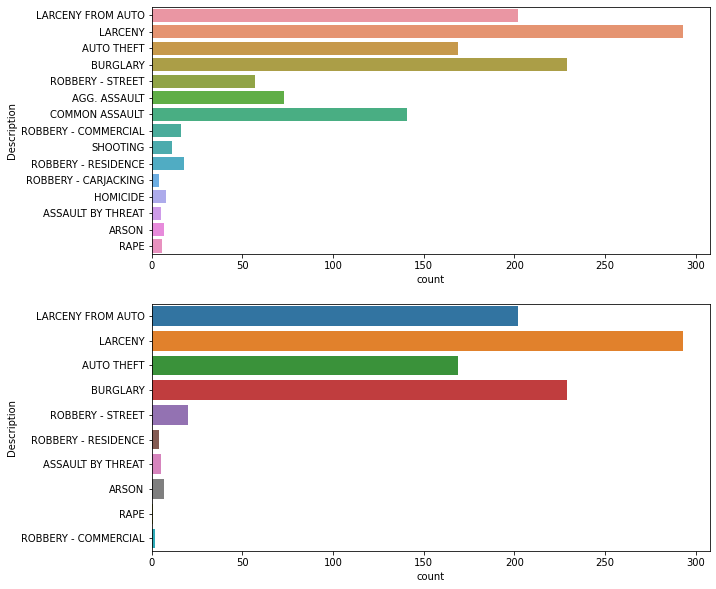

In [26]:
weapon_null = bpd_df[bpd_df['Weapon'].isnull()]

fig, ax = plt.subplots(2,1)
sns.countplot(y = bpd_df['Description'], ax = ax[0])
sns.countplot(y = weapon_null['Description'], ax = ax[1])
fig.set_size_inches(10,10)
fig.show()

By taking a further look at Weapon vs Description, we assume the NULL values stand for "no weapon", so we assign NULL values to "None".

In [27]:
bpd_df['Weapon'] = bpd_df['Weapon'].fillna('NONE')

In [28]:
# bpd_df.to_csv('../data/BPD_CRIME_DATA_CLEAN.csv', index=False)
# bpd_df_clean = pd.read_csv('../data/BPD_CRIME_DATA_CLEAN.csv')

In [29]:
bpd_df_clean.head()

,Unnamed: 0,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,...,Latitude,Location 1,Premise,Total Incidents,callDateTime,Priority,CallDescription,Season,Month,Hour
0,31238,2017-01-19,19:00:00,6D,4200 WICKFORD RD,LARCENY FROM AUTO,NaN,NONE,541.0,NORTHERN,...,39.34035,"(39.3403500000, -76.6266300000)",NaN,1,2017-01-20 09:37:00,Low,LARCENY F/AUTO,winter,1,19
1,31239,2017-01-19,19:00:00,6D,800 WEDGEWOOD RD,LARCENY FROM AUTO,NaN,NONE,823.0,SOUTHWESTERN,...,39.29449,"(39.2944900000, -76.7061200000)",NaN,1,2017-01-20 05:55:00,Low,LARCENY F/AUTO,winter,1,19
2,31244,2017-01-19,18:30:00,6E,3000 SHANNON DR,LARCENY,NaN,NONE,432.0,NORTHEASTERN,...,39.32524,"(39.3252400000, -76.5677400000)",NaN,1,2017-01-20 14:34:00,Low,LARCENY F/AUTO,winter,1,18
3,31255,2017-01-19,17:50:00,7A,0 N PORT ST,AUTO THEFT,Outside,NONE,221.0,SOUTHEASTERN,...,39.29265,"(39.2926500000, -76.5826700000)",STREET,1,2017-01-19 17:51:00,Medium,AUTO THEFT,winter,1,17
4,31256,2017-01-19,17:30:00,5A,1300 CAMBRIA ST,BURGLARY,NaN,NONE,911.0,SOUTHERN,...,39.23224,"(39.2322400000, -76.5911100000)",NaN,1,2017-01-19 17:38:00,Medium,BURGLARY,winter,1,17


### Description versus priority <a id='new'></a>

/Users/tuliprichard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


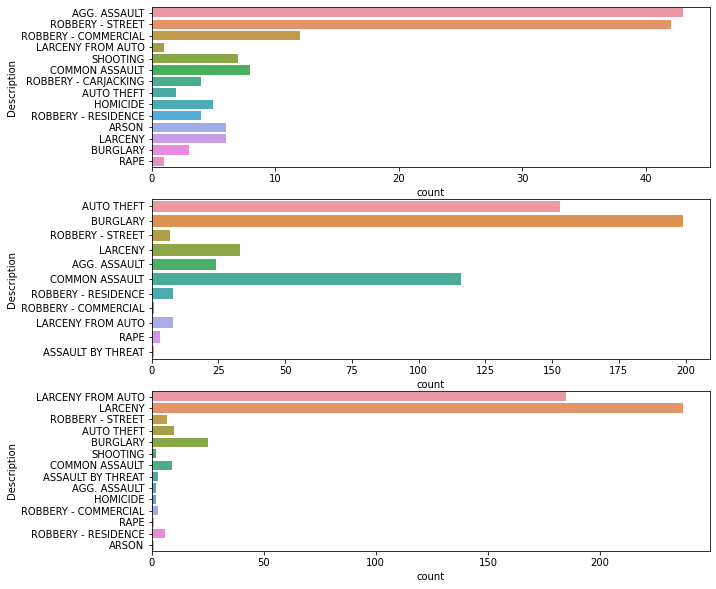

In [30]:
high_priority = bpd_df[bpd_df['Priority'] == 'High']
medium_priority = bpd_df[bpd_df['Priority'] == 'Medium']
low_priority = bpd_df[bpd_df['Priority'] == 'Low']

fig, ax = plt.subplots(3,1)
sns.countplot(y = high_priority['Description'], ax = ax[0])
sns.countplot(y = medium_priority['Description'], ax = ax[1])
sns.countplot(y = low_priority['Description'], ax = ax[2])
fig.set_size_inches(10,10)
fig.show()

In [31]:
bpd_df.to_csv('../data/crimes_with_calls_cleaned.csv', index=False)